In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [85]:
df=pd.read_csv('cow.csv')

In [86]:
df.rename(columns={'경락일자':'date'},inplace=True)
df.rename(columns={'1':'price'},inplace=True)
df['datetime'] = df['date'].apply(lambda x: pd.to_datetime(f"20{x}", format='%Y-%b'))


In [87]:
df['datetime']=df['datetime'].dt.strftime('%Y-%m')

In [88]:
df

,date,price,datetime
0,13-Jan,14498.31766,2013-01
1,13-Feb,13396.67663,2013-02
2,13-Mar,12914.19227,2013-03
3,13-Apr,12780.23766,2013-04
4,13-May,12340.69142,2013-05
...,...,...,...
127,23-Aug,14315.10509,2023-08
128,23-Sep,15991.13868,2023-09
129,23-Oct,14802.68385,2023-10
130,23-Nov,14399.18353,2023-11


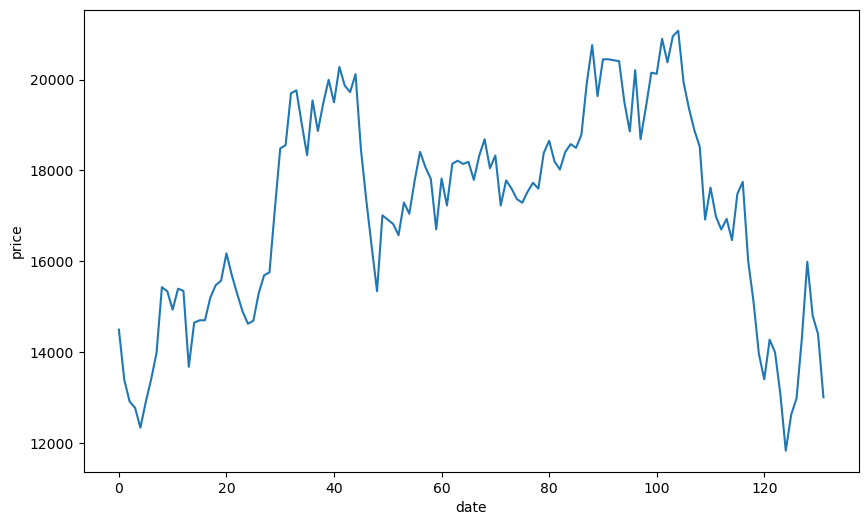

In [89]:
df['price'].plot(figsize=(10, 6))
plt.xlabel('date')
plt.ylabel('price')
plt.show()

In [90]:
df.isnull().sum()

date        0
price       0
datetime    0
dtype: int64

In [91]:
result = adfuller(df['price'])
print('ADF Statistic:',result[0])
print('p-value:', result[1])

ADF Statistic: -3.038655098634623
p-value: 0.03143881628490439


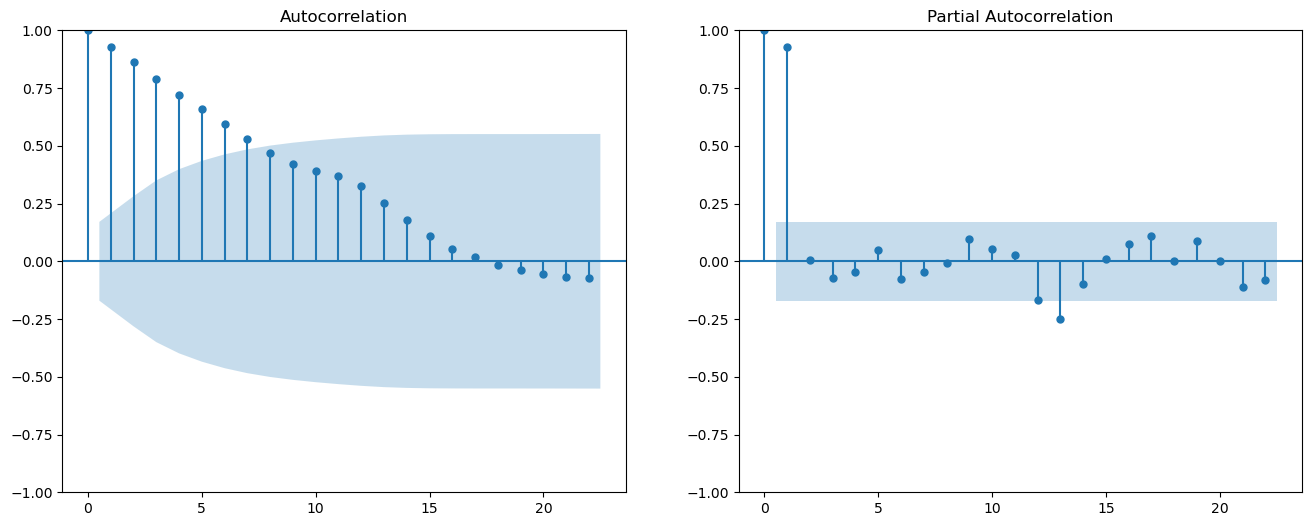

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
plot_acf(df['price'],ax=axes[0])
plot_pacf(df['price'],ax=axes[1])
plt.show()

In [93]:
model = ARIMA(df['price'], order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  132
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1061.834
Date:                Wed, 21 Aug 2024   AIC                           2129.667
Time:                        03:34:48   BIC                           2138.316
Sample:                             0   HQIC                          2133.182
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.715e+04   1203.413     14.248      0.000    1.48e+04    1.95e+04
ar.L1          0.9532      0.029     33.154      0.000       0.897       1.009
sigma2      5.575e+05    7.8e+04      7.147      0.0

In [94]:
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

print(forecast_values)
print(conf_int)

132    13203.657587
133    13388.388687
134    13564.465232
135    13732.292683
136    13892.257505
137    14044.728059
138    14190.055448
139    14328.574324
140    14460.603663
141    14586.447497
142    14706.395612
143    14820.724222
Name: predicted_mean, dtype: float64
      lower price   upper price
132  11740.219769  14667.095405
133  11366.673882  15410.103493
134  11144.759970  15984.170494
135  11000.833398  16463.751968
136  10905.650730  16878.864281
137  10843.904675  17245.551444
138  10806.353845  17573.757051
139  10786.905704  17870.242943
140  10781.297608  18139.909718
141  10786.417796  18386.477197
142  10799.921962  18612.869263
143  10820.001129  18821.447314


In [95]:
# 예측 결과를 데이터프레임으로 정리
forecast_df = pd.DataFrame({
    'Forecast': forecast_values,
    'Conf_int_low': conf_int.iloc[:, 0],
    'Conf_int_high': conf_int.iloc[:, 1]
})

# 예측 결과 출력
print(forecast_df)

         Forecast  Conf_int_low  Conf_int_high
132  13203.657587  11740.219769   14667.095405
133  13388.388687  11366.673882   15410.103493
134  13564.465232  11144.759970   15984.170494
135  13732.292683  11000.833398   16463.751968
136  13892.257505  10905.650730   16878.864281
137  14044.728059  10843.904675   17245.551444
138  14190.055448  10806.353845   17573.757051
139  14328.574324  10786.905704   17870.242943
140  14460.603663  10781.297608   18139.909718
141  14586.447497  10786.417796   18386.477197
142  14706.395612  10799.921962   18612.869263
143  14820.724222  10820.001129   18821.447314


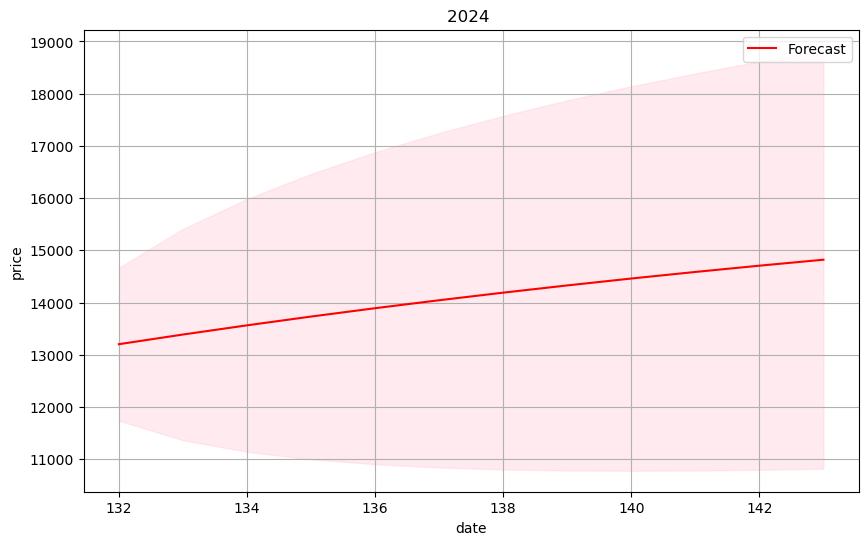

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['Conf_int_low'], forecast_df['Conf_int_high'], color='pink', alpha=0.3)
plt.title('2024 ')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.grid(True)
plt.show()